**Exercise 3.5**: A natural question about the Watts and Strorgatz paper is whether the small world phenomenon is specific to their generative model or whether other similar models yield the same qualitative result (high clustering and low path lengths).

To answer this question, choose a variation of the Watts and Strogatz model and repeat the experiment. There are two kinds of variation you might consider:

1) Instead of starting with a regular graph, start with another graph with high clustering. For example, you could put nodes at random locations in a 2-D space and connect each node to its nearest $k$ neighbors.

2) Experiment with different kinds of rewiring.

If a range of similar models yield similar behavior, we say that the results of the paper are robust.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

I cannot install utils and decorate, but I have found the source code for decorate. It is given below.

In [ ]:
def underride(d, **options):
    for key, val in options.items():
        d.setdefault(key, val)

    return d

def legend(**options):
    underride(options, loc="best", frameon=False)

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, **options)

def decorate(**options):
    loc = options.pop("loc", "best")
    if options.pop("legend", True):
        legend(loc=loc)

    plt.gca().set(**options)
    plt.tight_layout()

Provided below is the original experiment from the book. The code was already explained from the repository notebook of chapter 3 and the book, too. Hence I wont be providing any detailed comments.

**Original Experiment:**

In [ ]:
ps = np.logspace(-4, 0, 9)

In [ ]:
def flip(p):
  return np.random.random() < p

In [ ]:
def all_pairs(nodes):
  for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
      if i > j:
        yield u, v

In [ ]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

In [ ]:
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

In [ ]:
def rewire(G, p):
  nodes = set(G)
  for u, v in G.edges():
    if flip(p):
      choices = nodes - {u} - set(G[u])
      new_v = np.random.choice(list(choices))
      G.remove_edge(u, v)
      G.add_edge(u, new_v)

In [ ]:
def make_ws_graph(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

In [ ]:
def node_clustering(G, u):
  neighbors = G[u]
  k = len(neighbors)
  if k < 2:
    return np.nan

  possible = k*(k-1)/2
  exist = 0
  for v, w in all_pairs(neighbors):
    if G.has_edge(v, w):
      exist += 1
  return exist / possible

def clustering_coefficient(G):
  cu = [node_clustering(G, node) for node in G]
  return np.nanmean(cu)

In [ ]:
def path_lengths(G):
    length_iter = nx.shortest_path_length(G)
    for source, dist_map in length_iter:
        for dest, dist in dist_map.items():
            yield dist

def characteristic_path_length(G):
    return np.mean(list(path_lengths(G)))

In [ ]:
def run_one_graph(n, k, p):
  ws = make_ws_graph(n, k, p)
  mpl = characteristic_path_length(ws)
  cc = clustering_coefficient(ws)
  return mpl, cc

In [ ]:
def run_experiment(ps, n=1000, k=10, iters=20):
  res = []
  for p in ps:
    t = [run_one_graph(n, k, p) for _ in range(iters)]
    means = np.array(t).mean(axis=0)
    res.append(means)
  return np.array(res)

In [ ]:
res = run_experiment(ps)

In [ ]:
L, C = np.transpose(res)

In [ ]:
L /= L[0]
C /= C[0]

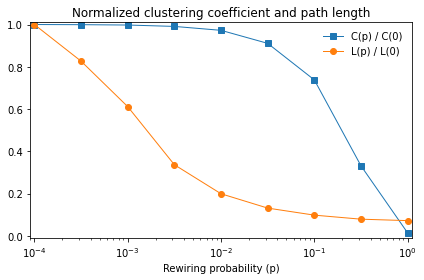

In [ ]:
plt.plot(ps, C, 's-', linewidth=1, label='C(p) / C(0)')
plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])


I would like to do different rewiring for this exercise. The simplest way to do this is by modifying ```flip(p)``` and using a different distributions instead. I will do it for an exponential, geometric, standard cauchy, and poisson distributions. The reason being is that these are the most common distributions used and often the introductory distributions being taught in classes.

**Exponential rewiring**

In [ ]:
def flip2(p):
  return np.random.exponential() < p

In [ ]:
def rewire2(G, p):
  nodes = set(G)
  for u, v in G.edges():
    if flip2(p):
      choices = nodes - {u} - set(G[u])
      new_v = np.random.choice(list(choices))
      G.remove_edge(u, v)
      G.add_edge(u, new_v)

In [ ]:
def make_ws_graph2(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire2(ws, p)
    return ws

In [ ]:
def run_one_graph2(n, k, p):
  ws = make_ws_graph2(n, k, p)
  mpl = characteristic_path_length(ws)
  cc = clustering_coefficient(ws)
  return mpl, cc

In [ ]:
def run_experiment2(ps, n=1000, k=10, iters=20):
  res = []
  for p in ps:
    t = [run_one_graph2(n, k, p) for _ in range(iters)]
    means = np.array(t).mean(axis=0)
    res.append(means)
  return np.array(res)

In [ ]:
res2 = run_experiment2(ps)

In [ ]:
L2, C2 = np.transpose(res2)

In [ ]:
L2 /= L2[0]
C2 /= C2[0]

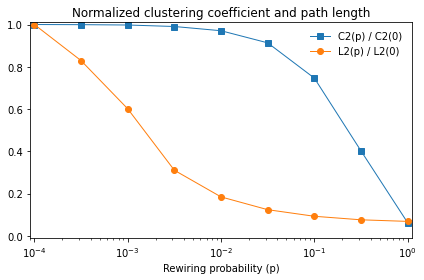

In [ ]:
plt.plot(ps, C2, 's-', linewidth=1, label='C2(p) / C2(0)')
plt.plot(ps, L2, 'o-', linewidth=1, label='L2(p) / L2(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])


Geometric rewiring

In [ ]:
def flip3(p):
  return np.random.laplace() < p

In [ ]:
def rewire3(G, p):
  nodes = set(G)
  for u, v in G.edges():
    if flip3(p):
      choices = nodes - {u} - set(G[u])
      new_v = np.random.choice(list(choices))
      G.remove_edge(u, v)
      G.add_edge(u, new_v)

In [ ]:
def make_ws_graph3(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire3(ws, p)
    return ws

In [ ]:
def run_one_graph3(n, k, p):
  ws = make_ws_graph3(n, k, p)
  mpl = characteristic_path_length(ws)
  cc = clustering_coefficient(ws)
  return mpl, cc

In [ ]:
def run_experiment3(ps, n=1000, k=10, iters=20):
  res = []
  for p in ps:
    t = [run_one_graph3(n, k, p) for _ in range(iters)]
    means = np.array(t).mean(axis=0)
    res.append(means)
  return np.array(res)

In [ ]:
res3 = run_experiment3(ps)

In [ ]:
L3, C3 = np.transpose(res3)

In [ ]:
L3 /= L3[0]
C3 /= C3[0]

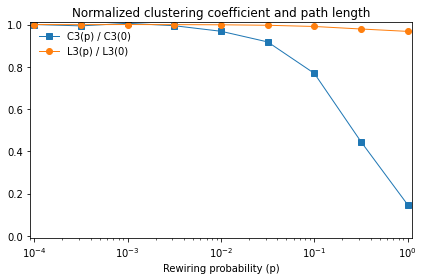

In [ ]:
plt.plot(ps, C3, 's-', linewidth=1, label='C3(p) / C3(0)')
plt.plot(ps, L3, 'o-', linewidth=1, label='L3(p) / L3(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])

**Standard Cauchy rewiring**

In [ ]:
def flip4(p):
  return np.random.standard_cauchy() < p

In [ ]:
def rewire4(G, p):
  nodes = set(G)
  for u, v in G.edges():
    if flip4(p):
      choices = nodes - {u} - set(G[u])
      new_v = np.random.choice(list(choices))
      G.remove_edge(u, v)
      G.add_edge(u, new_v)

In [ ]:
def make_ws_graph4(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire4(ws, p)
    return ws

In [ ]:
def run_one_graph4(n, k, p):
  ws = make_ws_graph4(n, k, p)
  mpl = characteristic_path_length(ws)
  cc = clustering_coefficient(ws)
  return mpl, cc

In [ ]:
def run_experiment4(ps, n=1000, k=10, iters=20):
  res = []
  for p in ps:
    t = [run_one_graph4(n, k, p) for _ in range(iters)]
    means = np.array(t).mean(axis=0)
    res.append(means)
  return np.array(res)

In [ ]:
res4 = run_experiment4(ps)

In [ ]:
L4, C4 = np.transpose(res4)

In [ ]:
L4 /= L4[0]
C4 /= C4[0]

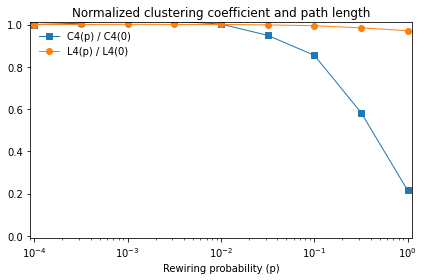

In [ ]:
plt.plot(ps, C4, 's-', linewidth=1, label='C4(p) / C4(0)')
plt.plot(ps, L4, 'o-', linewidth=1, label='L4(p) / L4(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])

**Poisson rewiring**

In [ ]:
def flip5(p):
  return np.random.poisson() < p

In [ ]:
def rewire5(G, p):
  nodes = set(G)
  for u, v in G.edges():
    if flip5(p):
      choices = nodes - {u} - set(G[u])
      new_v = np.random.choice(list(choices))
      G.remove_edge(u, v)
      G.add_edge(u, new_v)

In [ ]:
def make_ws_graph5(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire5(ws, p)
    return ws

In [ ]:
def run_one_graph5(n, k, p):
  ws = make_ws_graph5(n, k, p)
  mpl = characteristic_path_length(ws)
  cc = clustering_coefficient(ws)
  return mpl, cc

In [ ]:
def run_experiment5(ps, n=1000, k=10, iters=20):
  res = []
  for p in ps:
    t = [run_one_graph5(n, k, p) for _ in range(iters)]
    means = np.array(t).mean(axis=0)
    res.append(means)
  return np.array(res)

In [ ]:
res5 = run_experiment5(ps)

In [ ]:
L5, C5 = np.transpose(res5)

In [ ]:
L5 /= L5[0]
C5 /= C5[0]

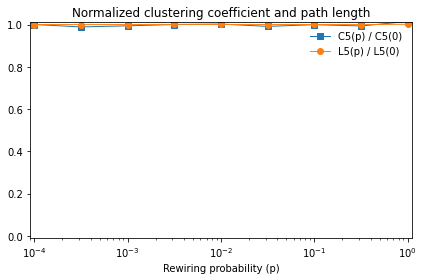

In [ ]:
plt.plot(ps, C5, 's-', linewidth=1, label='C5(p) / C5(0)')
plt.plot(ps, L5, 'o-', linewidth=1, label='L5(p) / L5(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])

So far, from the elementary distributions we had used, only the exponential distribution produced a similar result with the original experiment. Based from the result of my work, I am inclined to say that the result of the paper is not robust. Moreover, I am curious as how large should the range of similar behavior/results be to consider the result robust.